In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('train.csv')
df.corr()

""


In [3]:
#gatoperro.head()

In [4]:
#gatoperro.info()

In [5]:
def tcor(df):
    try:
        display(df.corr())
        fig, ax = plt.subplots(figsize=(6,5))
        v_cr = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
    except ValueError:
        print('ERROR: NO CORRELATION TABLE')
        pass
def thist(df):
    dat = df.select_dtypes(include=['float64','int64'])
    if len(dat.columns) > 0:
        display(dat.head())
        side = math.ceil(math.sqrt(dat.shape[1]))
        fig, frame = plt.subplots(side, side,figsize=(12,8))
        fig.tight_layout()
        x = 0
        y = 0
        for i, ax in enumerate(fig.axes):
            try:
                col = dat.columns[i]
                ax.set_xlabel(col)
                ax.hist(dat[col])
            except IndexError:
                pass
        plt.show()
        dat.iplot(kind='box')
    else:
        print("ERROR: NO NUMERIC FIELDS IN DATASET")
    
def load(namefile):
    return pd.read_csv(namefile, index_col=False)
def get_div(alist, values):
    init = """
       <body><style>.announce {color: #208ffb;font-weight: bold;}
       </style><div class="announce">NULLs in dataset:<br>---------------------<br>
       """
    inner = ""
    if type(alist)==list:
        for col, val in zip(alist, values):
            inner += col +": " + str(val) + "<br>"
    else:
        inner = alist
    closing = "</div></body>"
    html = init + inner + closing
    return html
def print_nulls(data):
    null_cols = data.isnull().sum()
    null_cols = null_cols[null_cols>0]
    drop_cols = list(null_cols[null_cols > 0].index)
    val_cols = [null_cols[col] for col in drop_cols]
    if len(drop_cols)==0:
        display(HTML(get_div('<br>This dataset has no nulls<br><br>','')))
    else:
        display(HTML(get_div(drop_cols,val_cols)))
def summary(csv):
    df = load(csv)
    display(df.head(2))
    display(df.tail(2))
    print_nulls(df)
    display(df.info())
    tcor(df)
    return df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


None

""


ERROR: NO CORRELATION TABLE


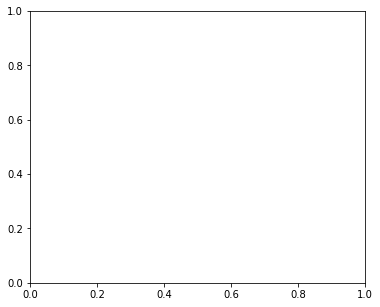

In [6]:
gatoperro = summary('train.csv')

In [7]:
gatoperro.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [8]:
thist(gatoperro)

ERROR: NO NUMERIC FIELDS IN DATASET


In [9]:
gatoperro.drop(['OutcomeSubtype'], axis=1,inplace=True)

In [10]:
from datetime import datetime as dt
def tod(ser):
    return dt.strptime(ser, '%Y-%m-%d %X').date()

gatoperro.DateTime = gatoperro.DateTime.apply(tod)

In [11]:
gatoperro.drop(['Name'], axis=1,inplace=True)
gatoperro.dropna(inplace=True)


In [12]:
gatoperro.isnull().sum()

AnimalID          0
DateTime          0
OutcomeType       0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

In [13]:

gatoperro = gatoperro.rename(columns={'DateTime':'Date'})
gatoperro.head()

,AnimalID,Date,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,2014-02-12,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,2013-10-13,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,2015-01-31,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,2014-07-11,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,2013-11-15,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [14]:
#gatoperro.to_csv('gatoperro_prepro.csv')

In [15]:
gatoperro.drop(['Breed'], axis=1,inplace=True)

In [16]:
def d2(string):
    res = 0
    if type(string)==str:
        t = string.split()
        mul = t[0]
        it = t[1]
        period = 0
        if 'year' in it:
            period = 365
        if 'month' in it:
            period = 30
        if 'week' in it:
            period = 7
        if 'day' in it:
            period = 1
        res = int(mul)*period
    return res
gatoperro['AgeOutcomeDays']=gatoperro['AgeuponOutcome'].apply(d2)
gatoperro.head()


,AnimalID,Date,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Color,AgeOutcomeDays
0,A671945,2014-02-12,Return_to_owner,Dog,Neutered Male,1 year,Brown/White,365
1,A656520,2013-10-13,Euthanasia,Cat,Spayed Female,1 year,Cream Tabby,365
2,A686464,2015-01-31,Adoption,Dog,Neutered Male,2 years,Blue/White,730
3,A683430,2014-07-11,Transfer,Cat,Intact Male,3 weeks,Blue Cream,21
4,A667013,2013-11-15,Transfer,Dog,Neutered Male,2 years,Tan,730


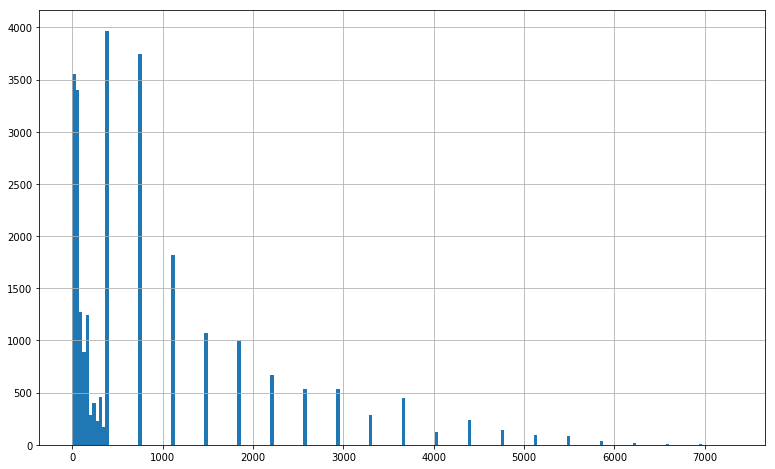

In [17]:
fig, ax = plt.subplots(figsize=(13,8)) 
gatoperro['AgeOutcomeDays'].hist(bins=200)

In [18]:
gatoperro.drop(['AgeuponOutcome'], axis=1,inplace=True)

In [19]:
dic = {'Brown':'Brownish', 'Chocolate':'Brownish', 'Tan':'Brownish', 'Whit': 'Whitish', 'Black':'Blackish',
      'Orange':'Orangeish', 'Blue':'Blueish'}
for color in dic.keys():
    gatoperro.Color= np.where(gatoperro.Color.str.startswith(color), dic[color], gatoperro.Color)

In [20]:
def othercolors(item):
    if item not in(dic.values()):
        return 'Other'
    return item

In [21]:
gatoperro.Color = gatoperro.Color.apply(othercolors)

In [22]:
gatoperro['Color'].value_counts()

Brownish     7455
Blackish     6641
Other        5782
Whitish      3343
Blueish      2146
Orangeish    1343
Name: Color, dtype: int64

In [23]:
def paint_cat(var):
    plt.figure(figsize=(16, 6))
    sns.countplot(gatoperro[var])
    plt.show()

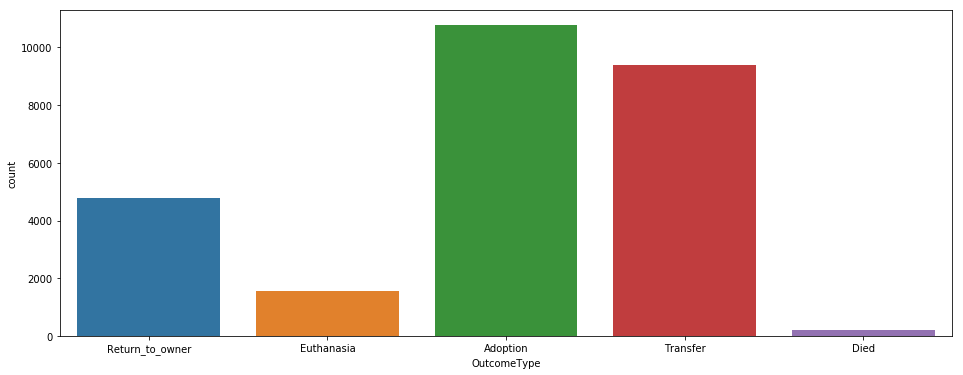

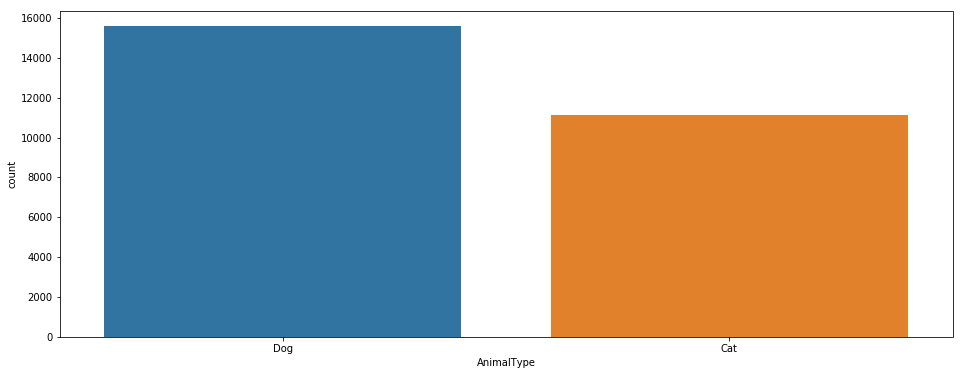

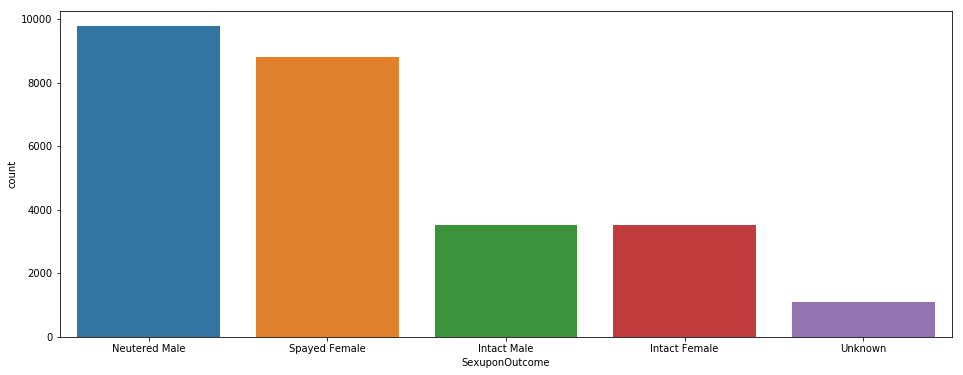

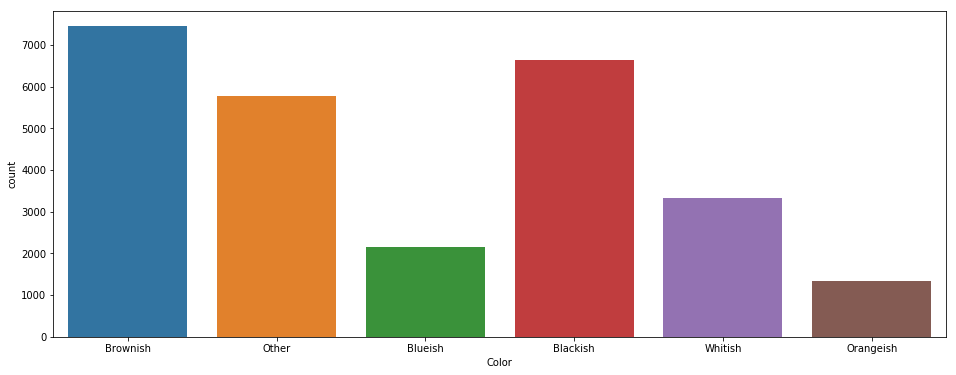

In [24]:
var_categorical = ['OutcomeType', 'AnimalType', 'SexuponOutcome', 'Color']

for var in var_categorical:
    paint_cat(var)

In [25]:
#gatoperro.to_csv('gatoperro_eda.csv')

In [26]:
gatoperro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26710 entries, 0 to 26728
Data columns (total 7 columns):
AnimalID          26710 non-null object
Date              26710 non-null object
OutcomeType       26710 non-null object
AnimalType        26710 non-null object
SexuponOutcome    26710 non-null object
Color             26710 non-null object
AgeOutcomeDays    26710 non-null int64
dtypes: int64(1), object(6)
memory usage: 2.9+ MB


In [27]:
gatoperro.head()

,AnimalID,Date,OutcomeType,AnimalType,SexuponOutcome,Color,AgeOutcomeDays
0,A671945,2014-02-12,Return_to_owner,Dog,Neutered Male,Brownish,365
1,A656520,2013-10-13,Euthanasia,Cat,Spayed Female,Other,365
2,A686464,2015-01-31,Adoption,Dog,Neutered Male,Blueish,730
3,A683430,2014-07-11,Transfer,Cat,Intact Male,Blueish,21
4,A667013,2013-11-15,Transfer,Dog,Neutered Male,Brownish,730


In [28]:
from datetime import datetime
def deixa_mes(x):
    do = x
    try:
        do = datetime.strptime(x, '%Y-%m-%d')
    except:
        pass
    return do.month

print(deixa_mes('2014-02-12'))

gatoperro['Month'] = gatoperro.Date.apply(deixa_mes)

2


In [29]:
gatoperro.head()

,AnimalID,Date,OutcomeType,AnimalType,SexuponOutcome,Color,AgeOutcomeDays,Month
0,A671945,2014-02-12,Return_to_owner,Dog,Neutered Male,Brownish,365,2
1,A656520,2013-10-13,Euthanasia,Cat,Spayed Female,Other,365,10
2,A686464,2015-01-31,Adoption,Dog,Neutered Male,Blueish,730,1
3,A683430,2014-07-11,Transfer,Cat,Intact Male,Blueish,21,7
4,A667013,2013-11-15,Transfer,Dog,Neutered Male,Brownish,730,11


In [30]:
gatoperro_clean = gatoperro.copy()
gatoperro_clean.drop(['AnimalID','Date'], axis=1,inplace=True)
gatoperro_clean.head()

,OutcomeType,AnimalType,SexuponOutcome,Color,AgeOutcomeDays,Month
0,Return_to_owner,Dog,Neutered Male,Brownish,365,2
1,Euthanasia,Cat,Spayed Female,Other,365,10
2,Adoption,Dog,Neutered Male,Blueish,730,1
3,Transfer,Cat,Intact Male,Blueish,21,7
4,Transfer,Dog,Neutered Male,Brownish,730,11


In [31]:
#gatoperro.to_csv('gatoperro_stats.csv',header=True)

In [32]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gatoperro_clean['y'] = le.fit_transform(gatoperro_clean['OutcomeType'])
gatoperro_clean.head()

dfy = gatoperro_clean[['OutcomeType','y']]
dfy.head()

,OutcomeType,AnimalType,SexuponOutcome,Color,AgeOutcomeDays,Month,y
0,Return_to_owner,Dog,Neutered Male,Brownish,365,2,3
1,Euthanasia,Cat,Spayed Female,Other,365,10,2
2,Adoption,Dog,Neutered Male,Blueish,730,1,0
3,Transfer,Cat,Intact Male,Blueish,21,7,4
4,Transfer,Dog,Neutered Male,Brownish,730,11,4


,OutcomeType,y
0,Return_to_owner,3
1,Euthanasia,2
2,Adoption,0
3,Transfer,4
4,Transfer,4


In [33]:

df1 = pd.get_dummies(
    data=gatoperro_clean[['AnimalType', 'SexuponOutcome','Color']],
    columns=['AnimalType', 'SexuponOutcome','Color']
    ,drop_first=True)


In [34]:
df1['Month'] = gatoperro_clean['Month']
df1.head()

,AnimalType_Dog,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,Color_Blueish,Color_Brownish,Color_Orangeish,Color_Other,Color_Whitish,Month
0,1,0,1,0,0,0,1,0,0,0,2
1,0,0,0,1,0,0,0,0,1,0,10
2,1,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,7
4,1,0,1,0,0,0,1,0,0,0,11


In [35]:
from sklearn.model_selection import train_test_split

X_train = df1
y_train = dfy['y']



X_train, X_test, y_train, y_test = train_test_split(
    df1, dfy['y'], test_size= 0.3, shuffle=True, random_state=42)


In [36]:
from sklearn.preprocessing import MinMaxScaler

def df_scaled(df):
    scaled = MinMaxScaler(feature_range = (0, 1)).fit_transform(df.values)
    out = pd.DataFrame(scaled, index=df.index, columns=df.columns)
    return out


In [37]:
X_train = df_scaled(X_train)
X_test = df_scaled(X_test)

In [38]:
#y_test = pd.read_csv("y_test.csv")
#X_test = pd.read_csv("X_test.csv")

In [39]:
X_train.shape
y_train.shape

y_test.shape
X_test.shape

X_test.head()
X_test.tail()
y_test.head()
y_test.tail()


(18697, 11)

(18697,)

(8013,)

(8013, 11)

,AnimalType_Dog,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,Color_Blueish,Color_Brownish,Color_Orangeish,Color_Other,Color_Whitish,Month
6275,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.454545
22587,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.181818
22814,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181818
18752,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
5916,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909091


,AnimalType_Dog,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,Color_Blueish,Color_Brownish,Color_Orangeish,Color_Other,Color_Whitish,Month
23638,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.363636
1419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636364
15919,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.727273
10335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272727
19090,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.909091


6275     4
22587    4
22814    3
18752    0
5916     0
Name: y, dtype: int64

23638    3
1419     4
15919    0
10335    3
19090    0
Name: y, dtype: int64

In [40]:
#X_test.drop(['Unnamed: 0'], axis=1,inplace=True)
#y_test.drop(['Unnamed: 0'], axis=1,inplace=True)

<Figure size 1152x432 with 0 Axes>

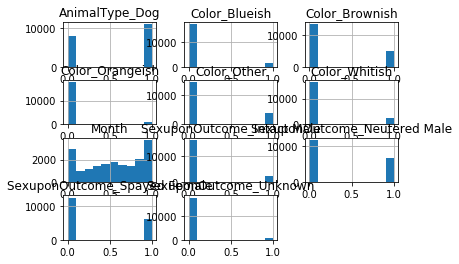

<Figure size 1152x432 with 0 Axes>

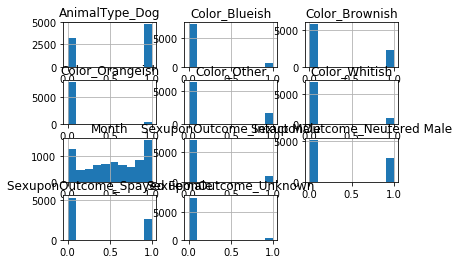

In [41]:
plt.figure(figsize=(16, 6));
X_train.hist();
plt.show();
plt.figure(figsize=(16, 6));
X_test.hist();
plt.show();

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def knn(X_train,y_train,X_test, y_test, nei):
    neigh = KNeighborsClassifier(n_neighbors=nei)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    return f1_score(y_test,y_pred, average='micro'), neigh.score(X_test,y_test)

def logreg(X_train,y_train,X_test, y_test, k):
    lr = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return f1_score(y_test,y_pred, average=k), lr.score(X_test,y_test)

def rndfo(X_train,y_train,X_test, y_test, k):
    clf = RandomForestClassifier(n_estimators=k, max_depth=2,
                            random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return f1_score(y_test,y_pred, average='micro'),clf.score(X_test,y_test)

def svc(X_train,y_train,X_test, y_test, k):
    svm = SVC(gamma=k)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return f1_score(y_test,y_pred, average='micro'), svm.score(X_test,y_test)

def dtre(X_train,y_train,X_test, y_test, k):
    tr = DecisionTreeClassifier(random_state=0, max_depth=k)
    tr.fit(X_train, y_train)
    y_pred = tr.predict(X_test)
    return f1_score(y_test,y_pred, average='micro'), tr.score(X_test,y_test)

In [62]:
def test(method, X_train ,y_train,X_test, y_test, k, alist):
    dic={}
    d2= {}
    for k in alist:
        s1, s2 = method(X_train,y_train,X_test, y_test,k)
        dic[k]=s1  
        d2[k]=s2
    return dic,d2

def plot(dic):
    colors = list("rgbcmykrgbcmyk")
    o = 0
    m = 0
    n = 0
    for key in dic:
        o = m
        m = max(m,dic[key])
        if o !=  m:
            n = key
        plt.scatter(key, dic[key], label=key,color=colors.pop());
    plt.legend()
    plt.title('best: '+str(n)+" -> "+str(round(m,4)))
    plt.show();
  

## KNN

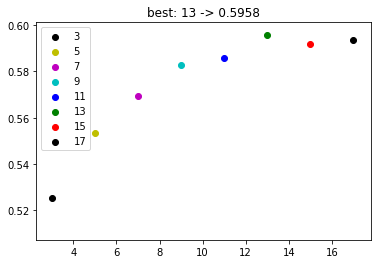

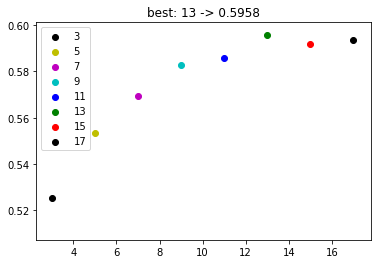

In [64]:
  
dic, d2 = test(knn, X_train ,y_train,X_test, y_test, 3, [3,5,7,9,11,13,15,17])
plot(dic)
plot(d2)

## LogisticRegression

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



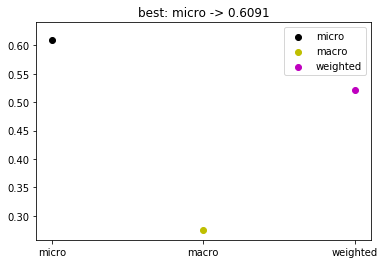

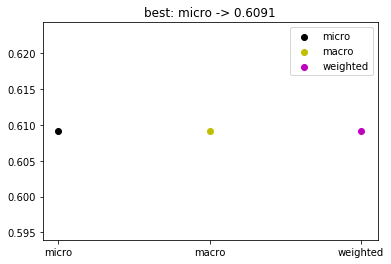

In [63]:
dic, d2 = test(logreg, X_train ,y_train,X_test,
           y_test, 0, ['micro','macro','weighted'])
plot(dic)
plot(d2)

## RandomForestClassifier

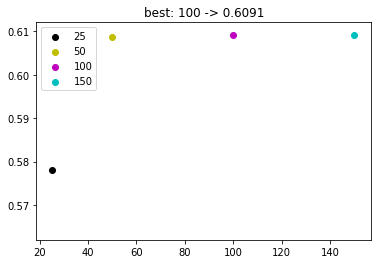

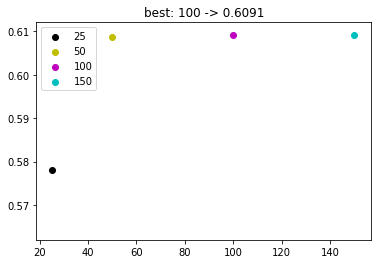

In [65]:
dic, d2 = test(rndfo, X_train ,y_train,X_test,
           y_test, 0, [25, 50,100, 150])
plot(dic)
plot(d2)

## SVC

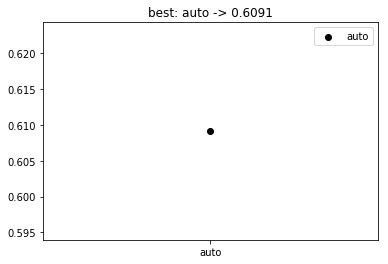

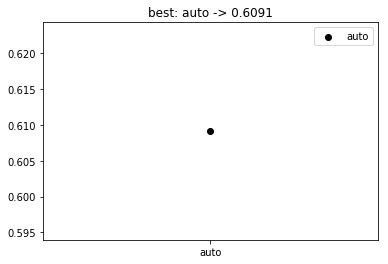

In [67]:
dic, d2 = test(svc, X_train ,y_train,X_test,
           y_test, 0, ['auto'])#,'rbf','poly','sigmoid'])
plot(dic)
plot(d2)

## DTREE

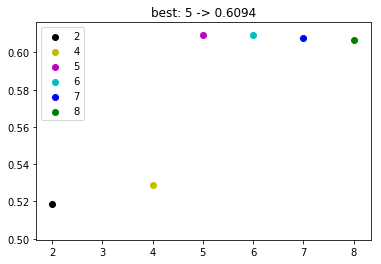

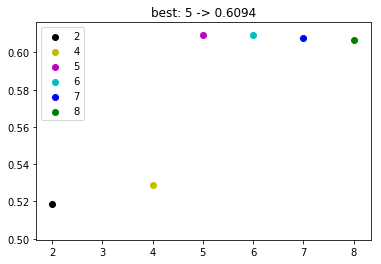

In [68]:
dic, d2 = test(dtre, X_train ,y_train,X_test,
           y_test, 0, [2,4,5,6,7,8])
plot(dic)
plot(d2)